# Masking MRS slices in each spectral band

One of the primary calibration data products (CDP) of the CALSPEC2 pipeline is the MRS DISTORTION CDP. This product contains information on the MRS integral-field-unit projected slices on the detector, along with the spatial and spectral distortion introduced by the optics. In this notebook we show how (/how well) the slice maps extension of the DISTORTION CDP represents the data. You can also think of this as a sanity check, where the slices should denote the 80% transmission cut-off of a flat source observed with the MRS. The 80% transmission value was used by Adrian Glauser to define the slice mask (see MIRI-TN-00001-ETH issue 2.1).

In [1]:
import funcs
import mrsobs

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'distortionMaps/'
lvl2path  = workDir+'FM_data/LVL2/'

In [3]:
sliceMap,sci_signal,sci_signal_swp,sci_signal_lwp,sci_signal_intcalsource = {},{},{},{},{}
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    # Load slice mask extension of distortion map
    sliceMap[band] = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)['sliceMap']
    
    # Load fringe correction map and replace NaNs by 1
    fringe_img = funcs.get_cdps(band,cdpDir,output='img')[0]
    fringe_img[np.isnan(fringe_img)] = 1
    
    # Load extended source signal
    source_signal,bkg_signal = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='800K',output='img')
    sci_signal[band] = (source_signal-bkg_signal)/fringe_img
    
    source_signal,bkg_signal = mrsobs.FM_MTS_800K_BB_MRS_RAD_08(lvl2path,band,wp_filter='SWP',output='img')
    sci_signal_swp[band] = (source_signal-bkg_signal)/fringe_img
    
    source_signal,bkg_signal = mrsobs.FM_MTS_800K_BB_MRS_RAD_08(lvl2path,band,wp_filter='LWP',output='img')
    sci_signal_lwp[band] = (source_signal-bkg_signal)/fringe_img
    
    source_signal = mrsobs.MIRI_internal_calibration_source(lvl2path,band,campaign='FM',output='img')
    sci_signal_intcalsource[band] = source_signal/fringe_img

<IPython.core.display.Javascript object>


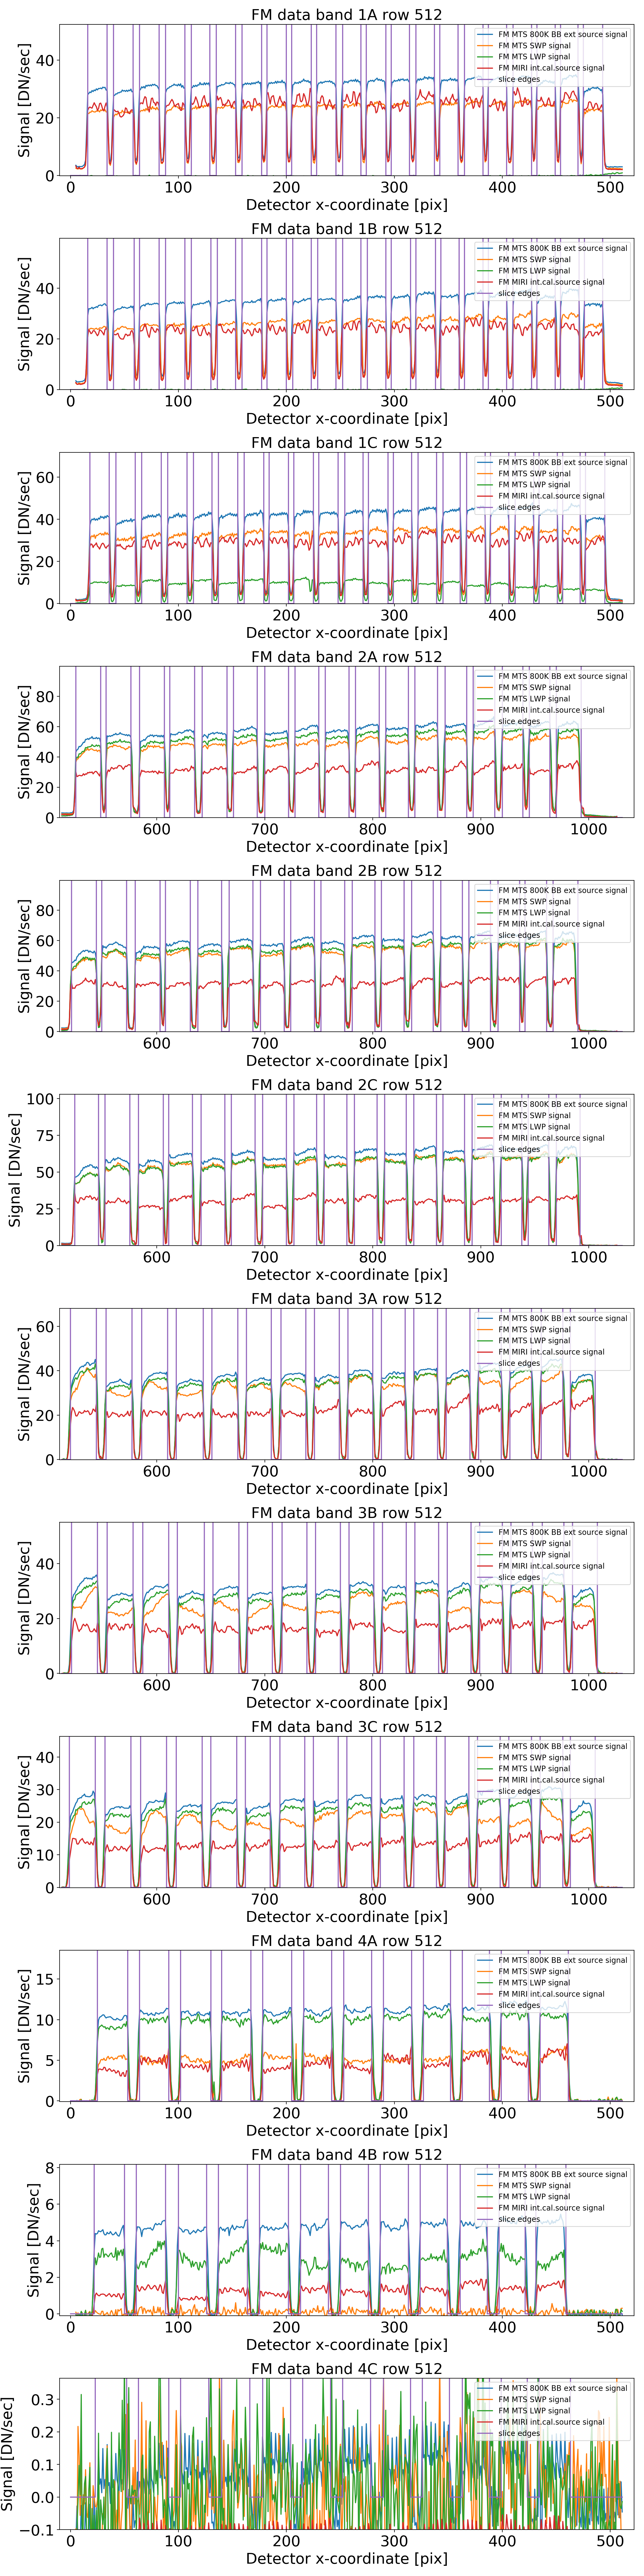

In [4]:
plt.close('all')
row = 100
fig,axs = plt.subplots(12,1,figsize=(12,48))
for plot,band in enumerate(['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']):
    axs[plot].set_title('FM data band {} row 512'.format(band),fontsize=20)
    if band[0] in ['1','4']:
        axs[plot].plot(sci_signal[band][row,:512],label='FM MTS 800K BB ext source signal')
        axs[plot].plot(sci_signal_swp[band][row,:512],label='FM MTS SWP signal')
        axs[plot].plot(sci_signal_lwp[band][row,:512],label='FM MTS LWP signal')
        axs[plot].plot(sci_signal_intcalsource[band][row,:512]/30.,label='FM MIRI int.cal.source signal')
        axs[plot].step(np.arange(len(sliceMap[band][row,:512])),sliceMap[band][row,:512]*1000.,label='slice edges')
        axs[plot].set_ylim(-0.1,1.5*np.max(sci_signal[band][row,:512][~np.isnan(sci_signal[band][row,:512])]))
        axs[plot].set_xlim(-10,522)
    elif band[0] in ['2','3']:
        axs[plot].plot(512+np.arange(len(sci_signal[band][row,512:])),sci_signal[band][row,512:],label='FM MTS 800K BB ext source signal')
        axs[plot].plot(512+np.arange(len(sci_signal_swp[band][row,512:])),sci_signal_swp[band][row,512:],label='FM MTS SWP signal')
        axs[plot].plot(512+np.arange(len(sci_signal_lwp[band][row,512:])),sci_signal_lwp[band][row,512:],label='FM MTS LWP signal')
        axs[plot].plot(512+np.arange(len(sci_signal_intcalsource[band][row,512:])),sci_signal_intcalsource[band][row,512:]/30.,label='FM MIRI int.cal.source signal')
        axs[plot].step(512+np.arange(len(sliceMap[band][row,512:])),sliceMap[band][row,512:]*1000.,label='slice edges')
        axs[plot].set_ylim(-0.1,1.5*np.max(sci_signal[band][row,512:][~np.isnan(sci_signal[band][row,512:])]))
        axs[plot].set_xlim(510,1042)
    axs[plot].set_xlabel('Detector x-coordinate [pix]',fontsize=20)
    axs[plot].set_ylabel('Signal [DN/sec]',fontsize=20)
    axs[plot].legend(loc='upper right',fontsize=10)
    axs[plot].tick_params(axis='both',labelsize=20)
plt.tight_layout()

In [4]:
# check for any discrepancies between different extended BB temperatures
sliceMap,sci_signal_800K,sci_signal_600K,sci_signal_400K = {},{},{},{}
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    # Load slice mask extension of distortion map
    sliceMap[band] = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir)['sliceMap']
    
    # Load fringe correction map and replace NaNs by 1
    fringe_img = funcs.get_cdps(band,cdpDir,output='img')[0]
    fringe_img[np.isnan(fringe_img)] = 1
    
    # Load extended source signal
    source_signal,bkg_signal = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='800K',output='img')
    sci_signal_800K[band] = (source_signal-bkg_signal)/fringe_img
    
    source_signal,bkg_signal = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='600K',output='img')
    sci_signal_600K[band] = (source_signal-bkg_signal)/fringe_img
    
    source_signal,bkg_signal = mrsobs.FM_MTS_BB_extended_source(lvl2path,band,bb_temp='400K',output='img')
    sci_signal_400K[band] = (source_signal-bkg_signal)/fringe_img

In [ ]:
plt.close('all')
row = 100
fig,axs = plt.subplots(12,1,figsize=(12,48))
for plot,band in enumerate(['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']):
    axs[plot].set_title('FM data band {} row 512'.format(band),fontsize=20)
    if band[0] in ['1','4']:
        axs[plot].plot(sci_signal_800K[band][row,:512],label='FM MTS 800K BB ext source signal')
        axs[plot].plot(sci_signal_600K[band][row,:512]*3.5,label='FM MTS 600K BB ext source signal')
        axs[plot].plot(sci_signal_400K[band][row,:512]*40.,label='FM MTS 400K BB ext source signal')
        axs[plot].step(np.arange(len(sliceMap[band][row,:512])),sliceMap[band][row,:512]*1000.,label='slice edges')
        axs[plot].set_ylim(-0.1,1.5*np.max(sci_signal_800K[band][row,:512][~np.isnan(sci_signal_800K[band][row,:512])]))
        axs[plot].set_xlim(-10,522)
    elif band[0] in ['2','3']:
        axs[plot].plot(512+np.arange(len(sci_signal_800K[band][row,512:])),sci_signal_800K[band][row,512:],label='FM MTS 800K BB ext source signal')
        axs[plot].plot(512+np.arange(len(sci_signal_600K[band][row,512:])),sci_signal_600K[band][row,512:]*3.5,label='FM MTS 600K BB ext source signal')
        axs[plot].plot(512+np.arange(len(sci_signal_400K[band][row,512:])),sci_signal_400K[band][row,512:]*40.,label='FM MTS 400K BB ext source signal')
        axs[plot].step(512+np.arange(len(sliceMap[band][row,512:])),sliceMap[band][row,512:]*1000.,label='slice edges')
        axs[plot].set_ylim(-0.1,1.5*np.max(sci_signal_800K[band][row,512:][~np.isnan(sci_signal_800K[band][row,512:])]))
        axs[plot].set_xlim(510,1042)
    axs[plot].set_xlabel('Detector x-coordinate [pix]',fontsize=20)
    axs[plot].set_ylabel('Signal [DN/sec]',fontsize=20)
    axs[plot].legend(loc='upper right',fontsize=10)
    axs[plot].tick_params(axis='both',labelsize=20)
plt.tight_layout()